**House Prices - Advanced Regression Techniques**

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

[Kaggle page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

# Setup

In [1]:
import os
# Where to save the figures
CURRENT_DIR = "." 
#The dot . is the current directory; 
# .. refers to one directory further up in the hierarchy
IMAGES_PATH = os.path.join(CURRENT_DIR, "images_23yt") #This is equal to current_dir/images
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
# To plot pretty figures
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd

# EDA(Exploratory Data Analysis)

### Get an overall view of the data

In [2]:
#read data
df_train = pd.read_csv('./data/train.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#drop column ID:
df_train = df_train.drop(columns = ['Id'])

In [5]:
#check columns
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [7]:
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [8]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Check missing data and drop columns with high missing rate

In [9]:
#check missing data
def missing_values_table(df):
        #1 Total missing values
        mis_val = df.isnull().sum()
        
        #2 Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #3 Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #4 Rename the columns
        mis_val_table_rn = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Missing Values'})
        
        #5 Only keep the columns with missing values
        mis_val_table_only = mis_val_table_rn.loc[mis_val_table_rn['% of Missing Values'] > 0]
        
        #6 Return the dataframe with missing information
        return mis_val_table_only

In [10]:
missings=missing_values_table(df_train)
missings

,Missing Values,% of Missing Values
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


In [17]:
## find columns with missing > 30%
mis_columns = list(missings.index[missings['% of Missing Values'] > 30])
mis_columns

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [18]:
# drop these columns
df_train = df_train.drop(columns = mis_columns)

In [19]:
# reapply this missing function
re_mis_val_table = missing_values_table(df_train)

In [20]:
re_mis_val_table.sort_values(by = '% of Missing Values', ascending =False)

,Missing Values,% of Missing Values
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247
BsmtCond,37,2.534247


#### The target variable - SalePrice

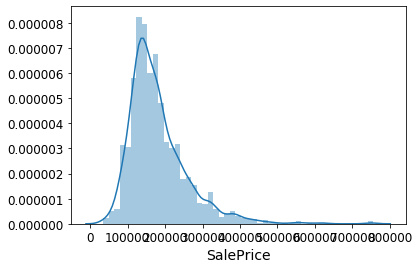

In [21]:
#histogram
sns.distplot(df_train['SalePrice'])

In [22]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [23]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


##### Relationship with numerical variables:

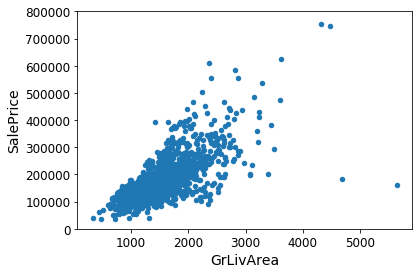

In [24]:
#scatter plot GrLivArea vs. SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y ='SalePrice', ylim = (0, 800000))

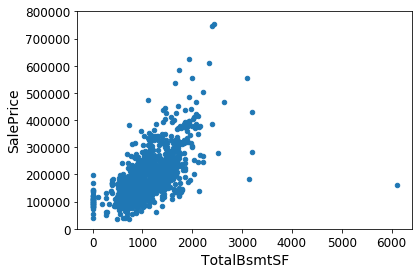

In [25]:
#scatter plot TotalBsmtSF vs. SalePrice
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis = 1)
data.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice', ylim = (0, 800000))

##### Relationship with categorical variables:

(-0.5, 9.5, 0, 800000)

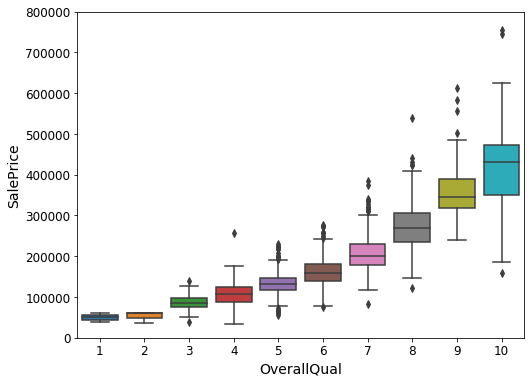

In [26]:
#box plot OverallQual vs. SalePrice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

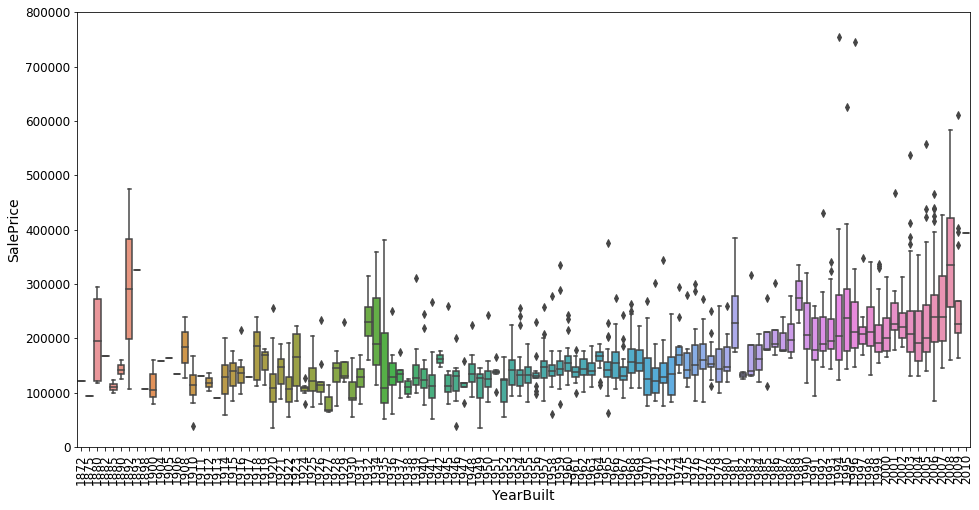

In [27]:
#box plot YearBuilt SalePrice
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x = 'YearBuilt', y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90) #rotate the x-axis variables

### Explore all the features

- Numerical features

In [28]:
# Finding numeric features
list(set(df_train.dtypes.tolist())) #get all the types of the variables

[dtype('float64'), dtype('O'), dtype('int64')]

In [29]:
df_num = df_train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Saving figure num_histogram_plots


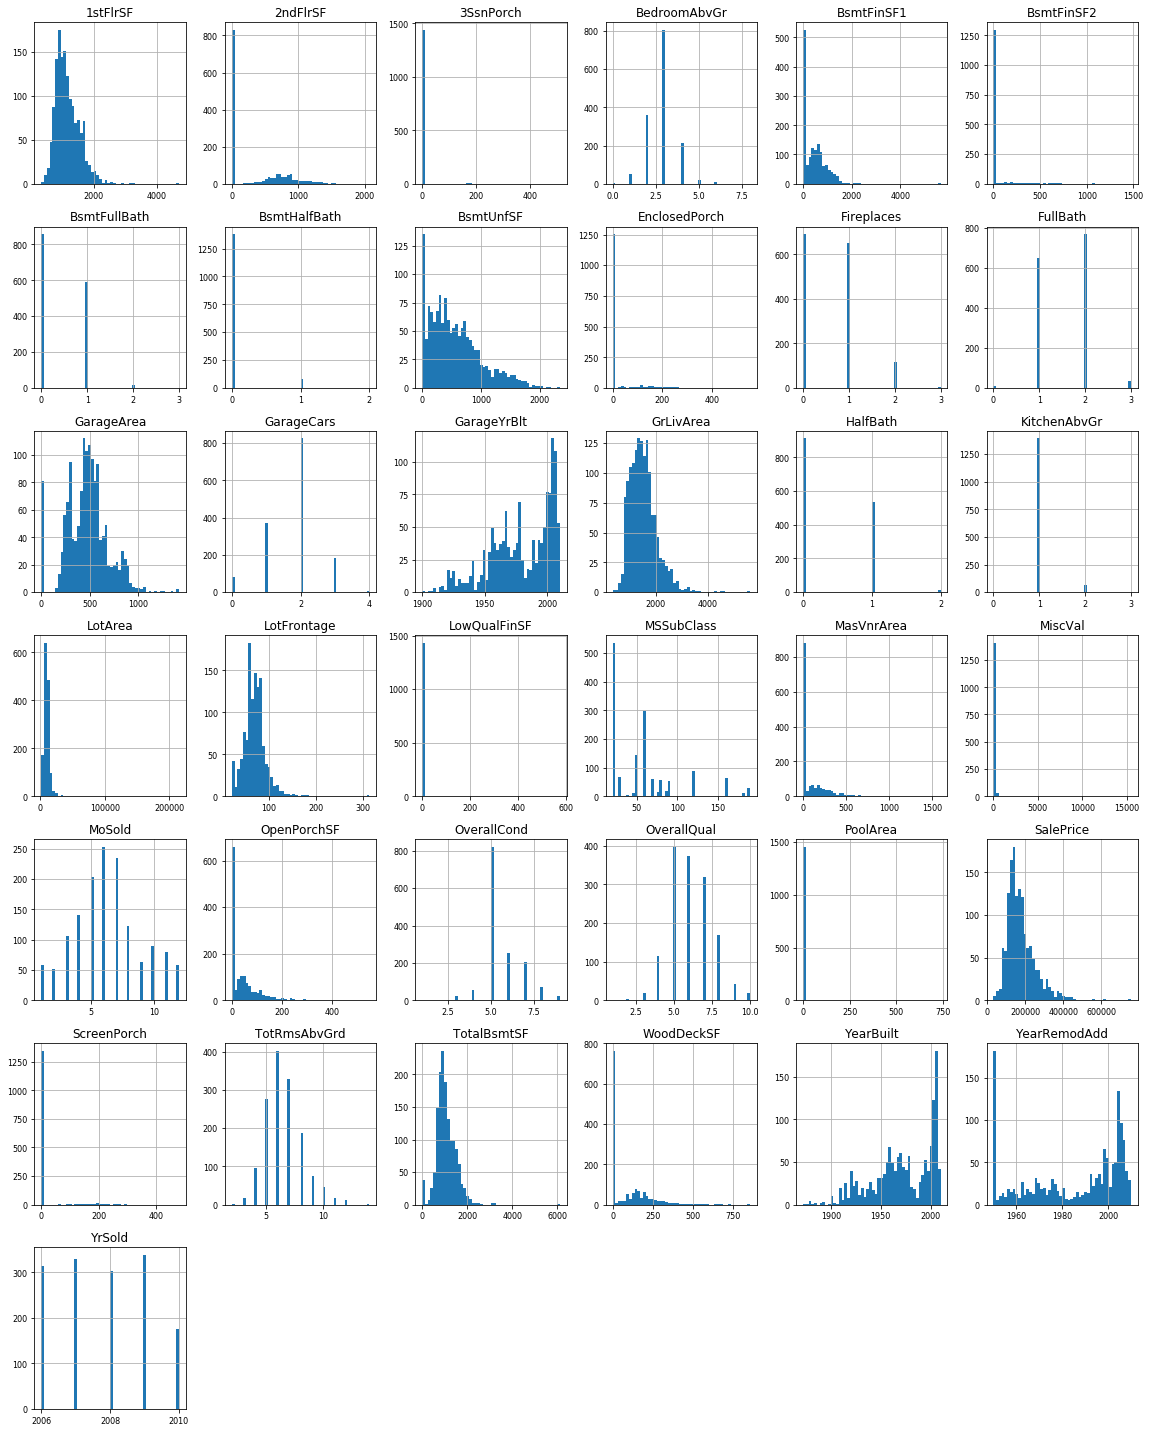

In [30]:
#plot all numerical features
df_num.hist(figsize = (16, 20), bins = 50, xlabelsize = 8, ylabelsize = 8); 
save_fig("num_histogram_plots")

Features such as `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea` have a similar distribution to `SalePrice`'s

In [31]:
df_num.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [32]:
df_num.corr()['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [33]:
#find which features are strongly correlated with SalePrice and store them into a variable -> top_corr_features
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice, need to get rid of it
top_corr_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_corr_features), top_corr_features))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


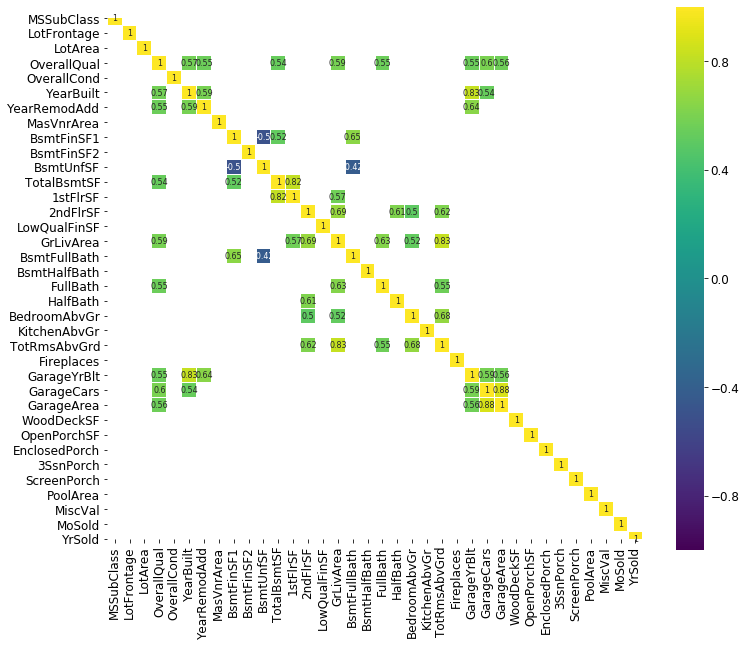

In [34]:
#use heatmap to see if some variables are linked between each other (check if there is multicollinearity)
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

A lot of features seems to be correlated between each other but some of them such as YearBuild/GarageYrBlt may just indicate a price inflation over the years. As for 1stFlrSF/TotalBsmtSF, it is normal that the more the 1st floor is large (considering many houses have only 1 floor), the more the total basement will be large.

We can conclude that, by essence, some of those features may be combined between each other in order to reduce the number of features (`1stFlrSF`/`TotalBsmtSF`, `GarageCars`/`GarageArea`)

Some of the features of our dataset looks like numerical but are categorical. To separate the categorical from quantitative features need to check the data_description.txt file. According to this file we end up with the folowing columns:

In [35]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df_num[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


We need to take the strongly correlated quantitative features from this dataset and analyse them one by one

In [36]:
features_to_analyse = [i for i in quantitative_features_list if i in top_corr_features]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

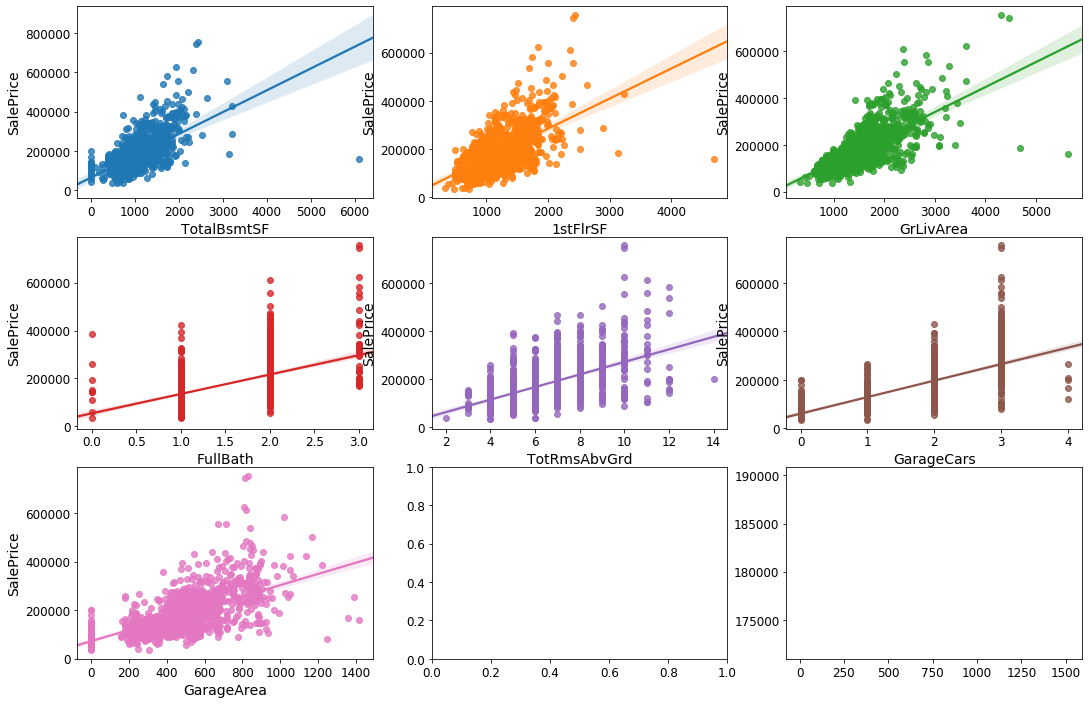

In [37]:
#roughly did a regression
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x = features_to_analyse[i], y = 'SalePrice', data = df_train[features_to_analyse], ax = ax)

- Categorical features

Getting all the categorical features of our dataset

In [38]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
categorical_features = [i for i in df_train.columns.tolist() if i not in quantitative_features_list[:-1]]
df_categorical = df_train[categorical_features]
df_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


we only look into non-numerical features right now

In [39]:
df_not_num = df_categorical.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 38 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


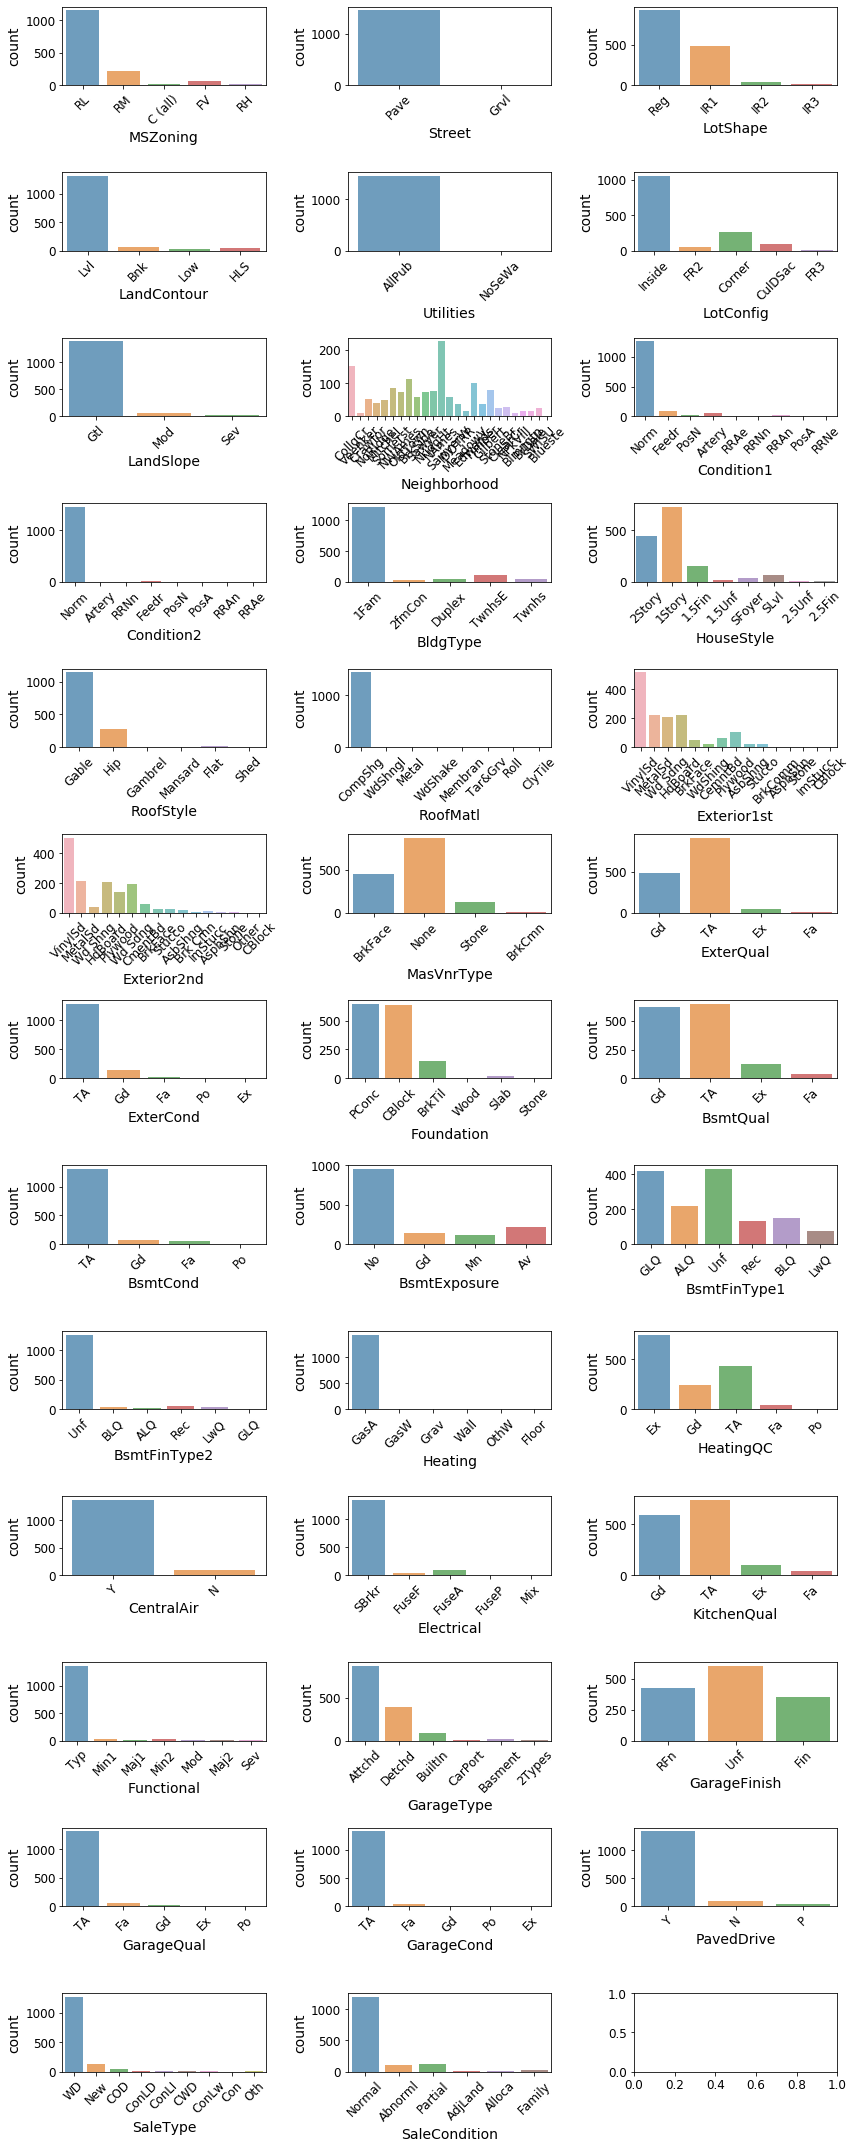

In [40]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

Some categories are predominant for some features such as `Utilities`, `Heating`, `GarageCond`, `Functional`. These features may not be relevant for our predictive model

/Users/Yuta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Yuta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Yuta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figure

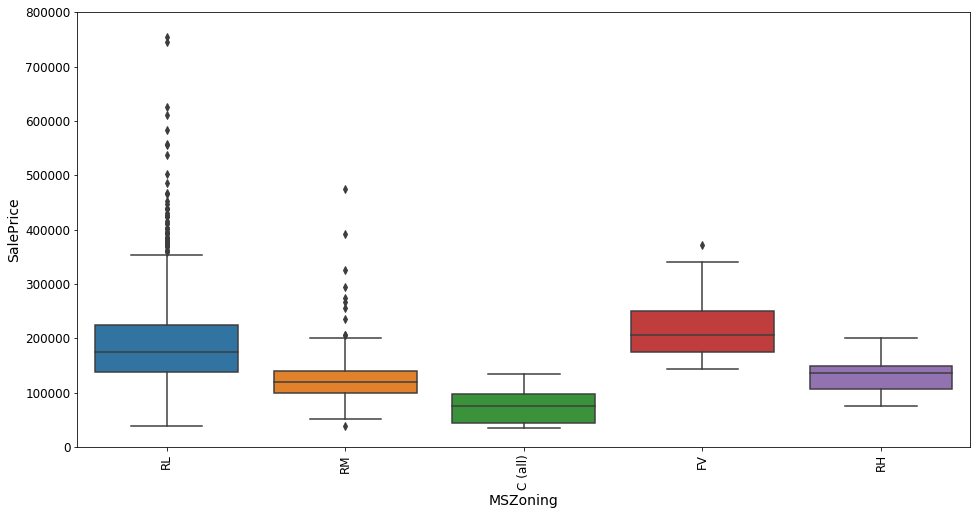

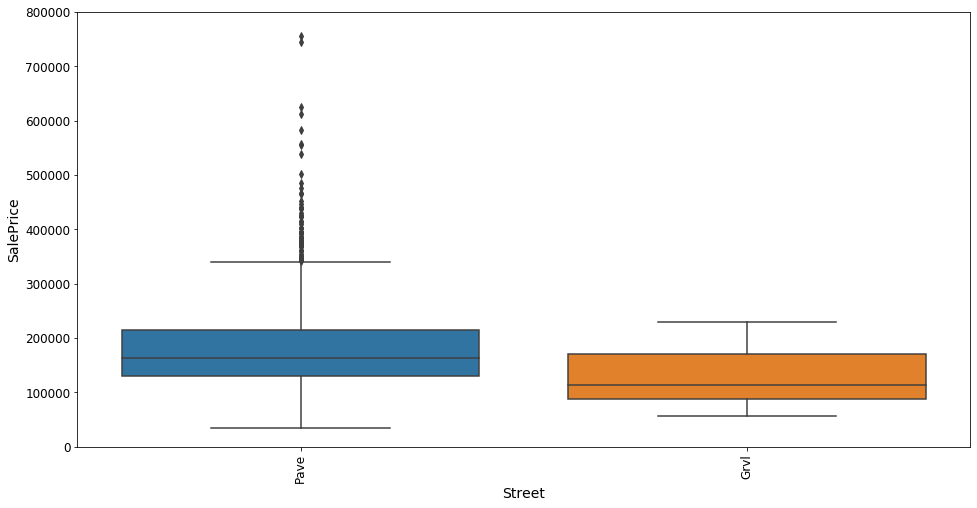

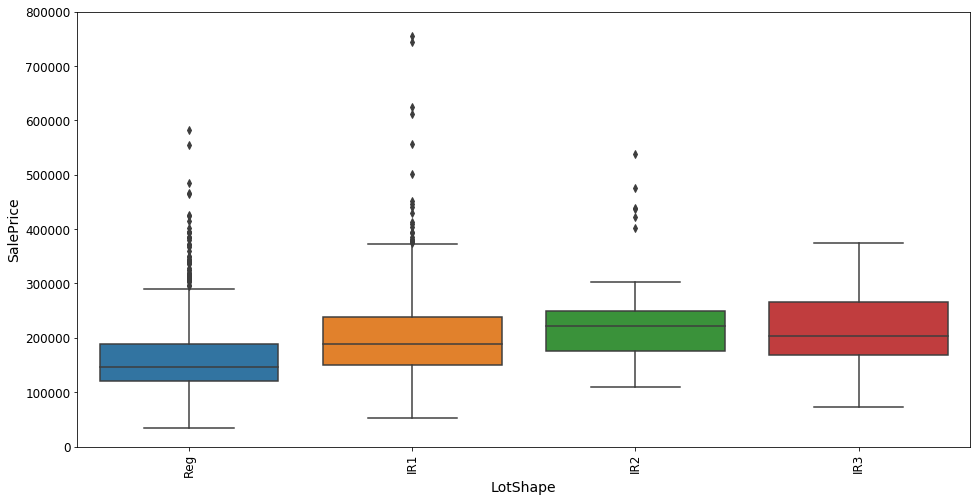

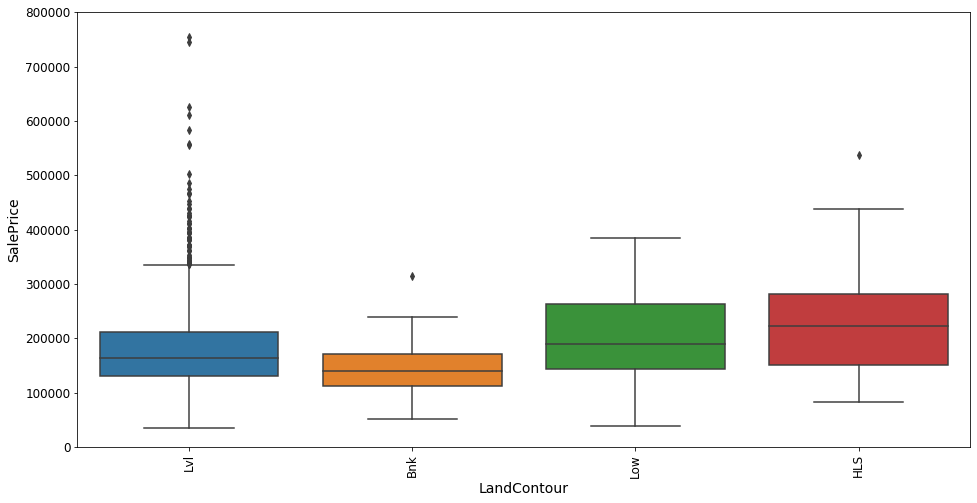

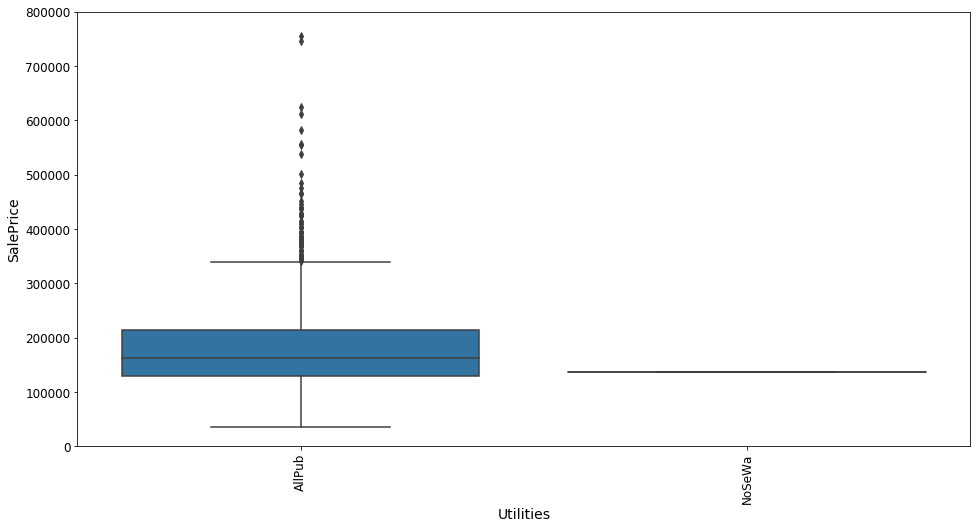

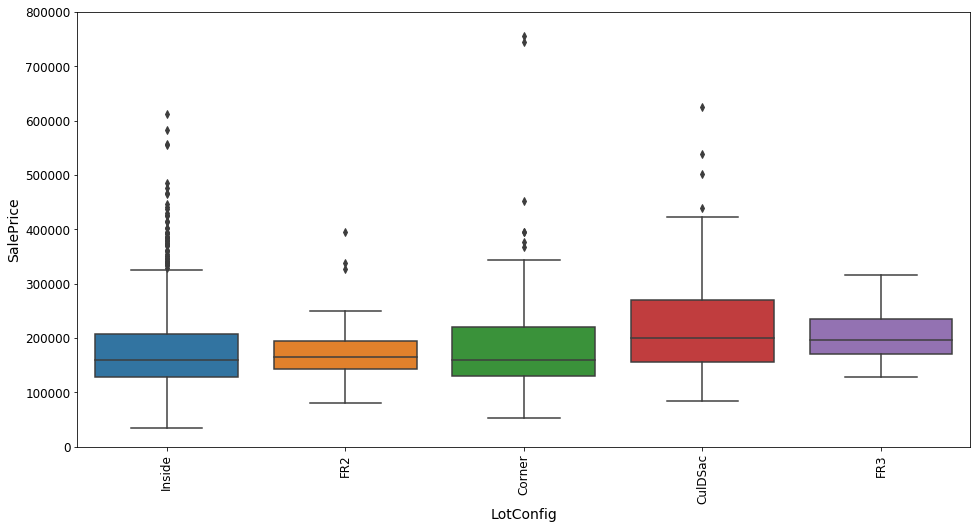

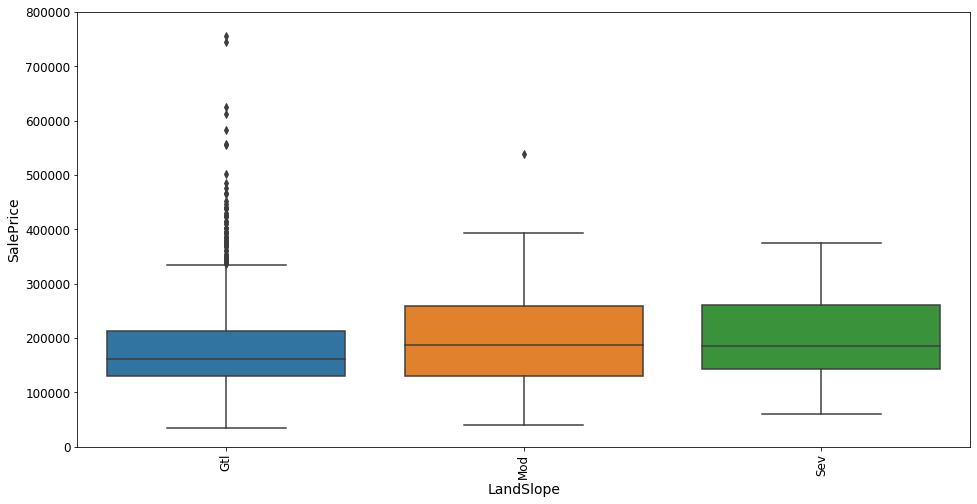

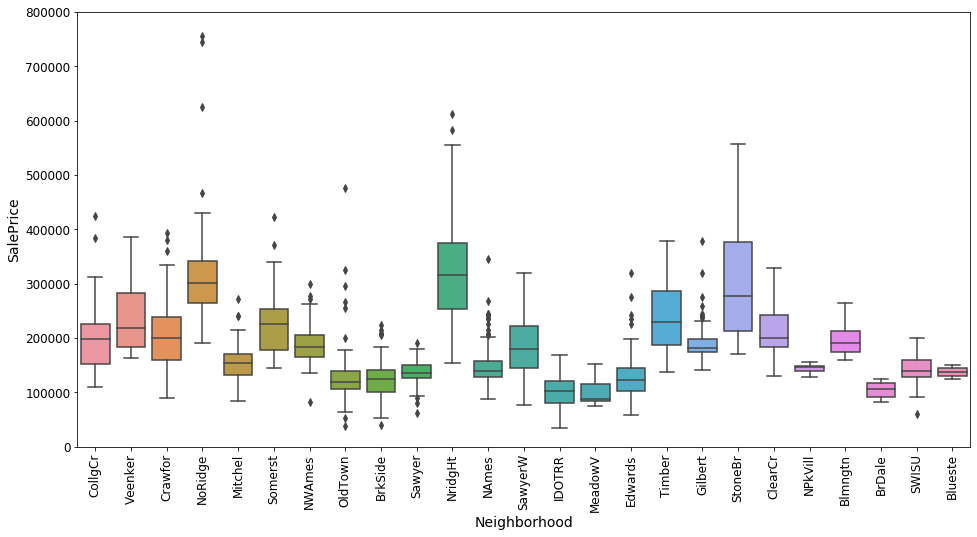

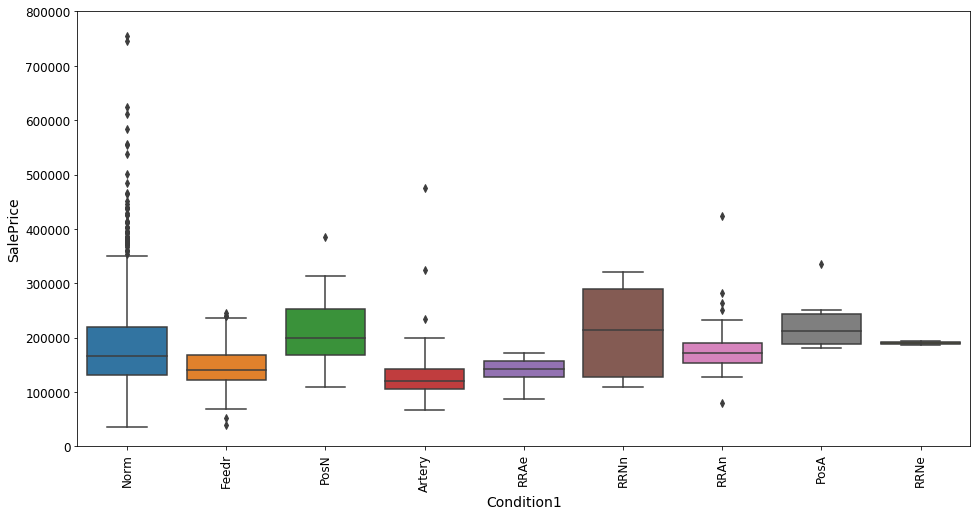

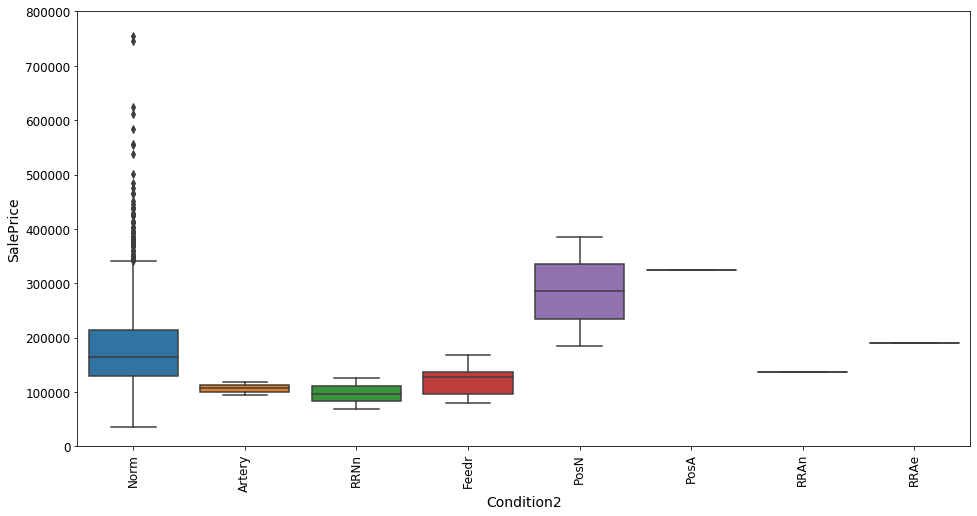

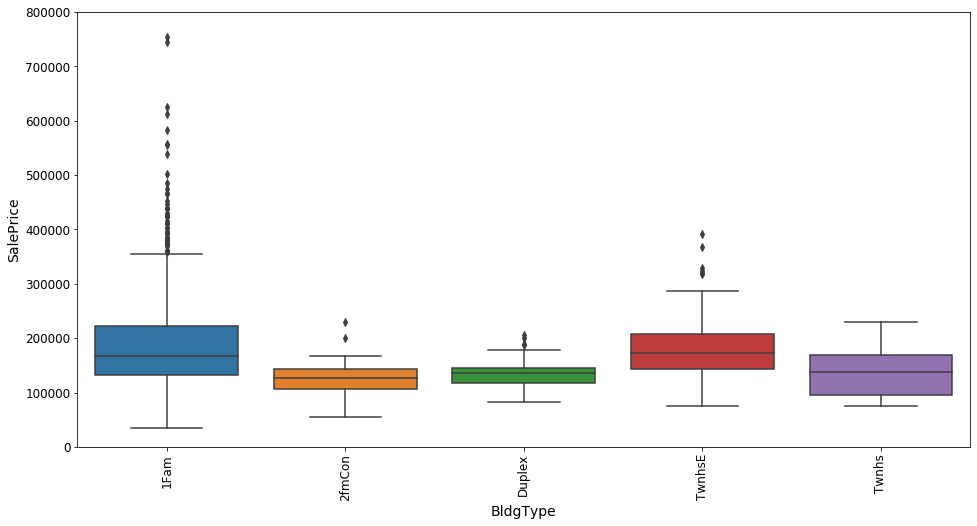

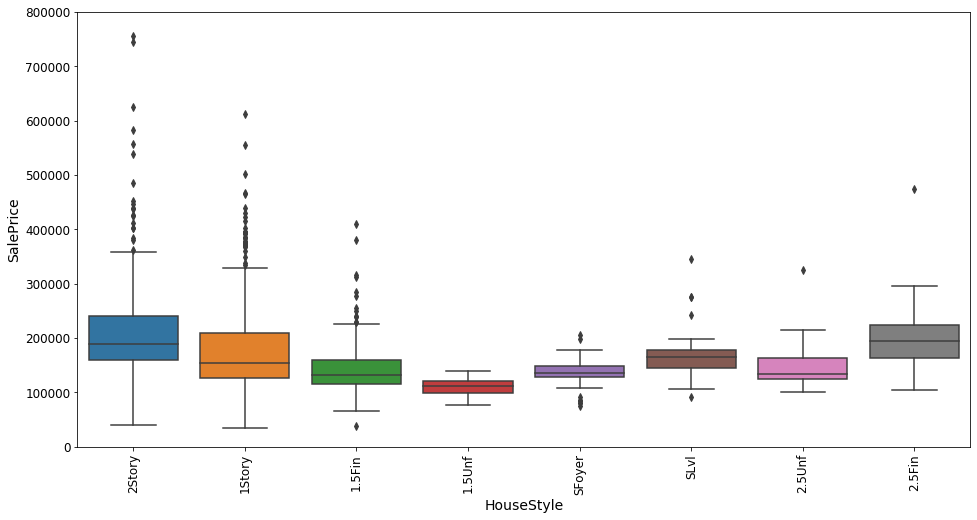

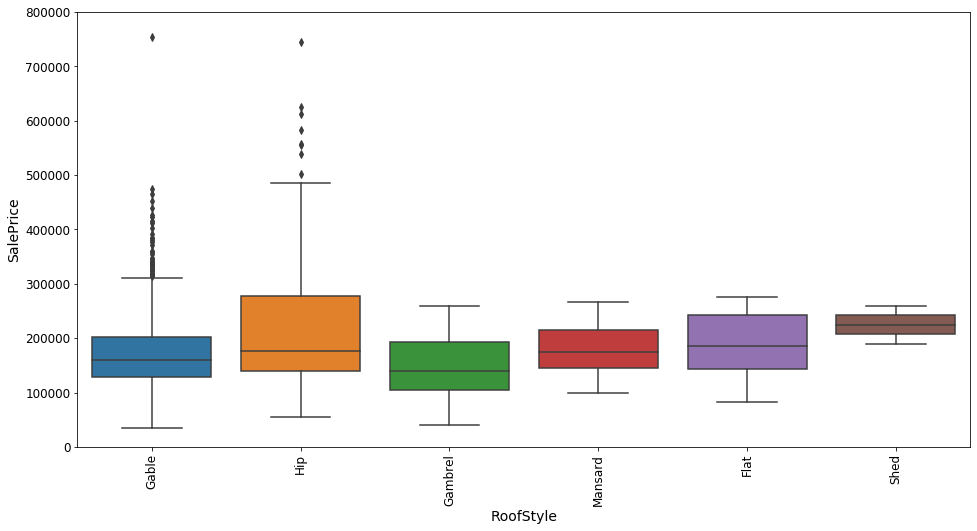

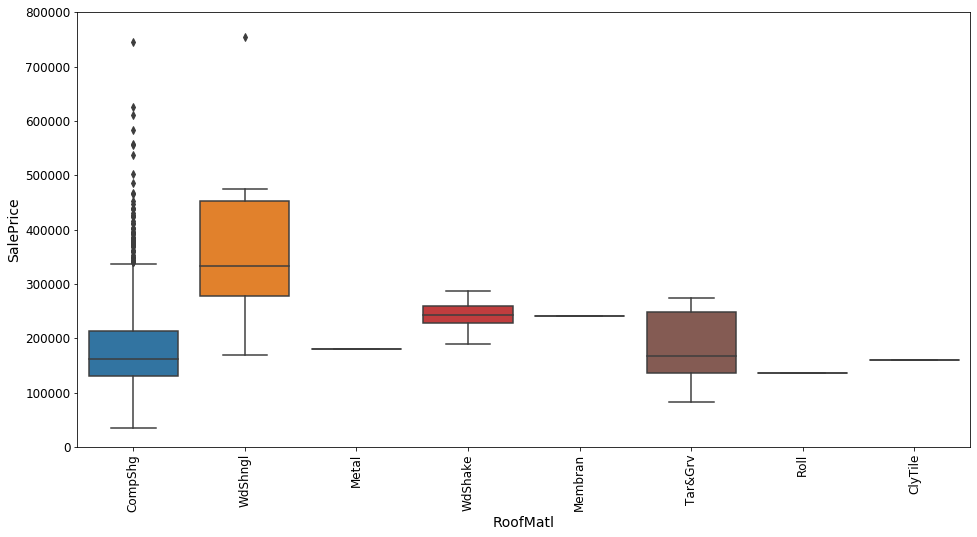

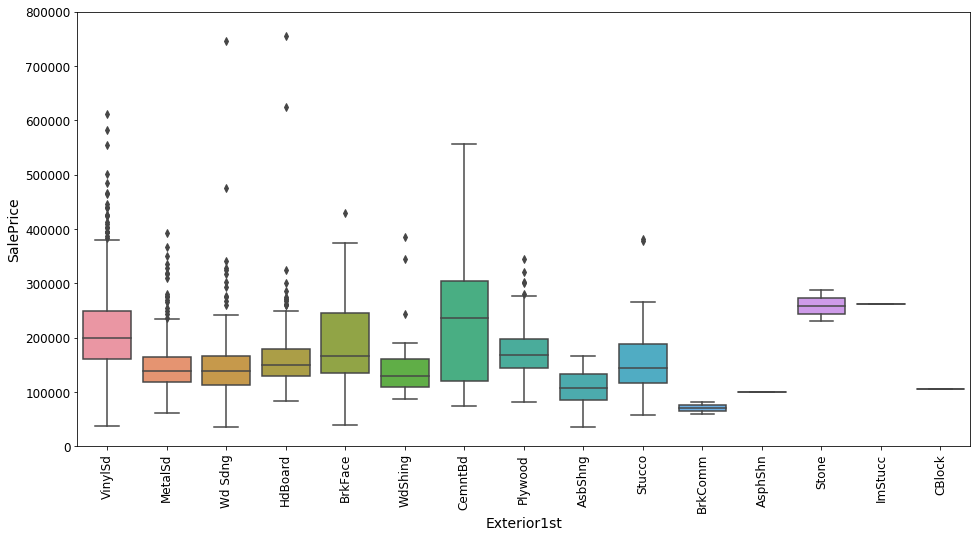

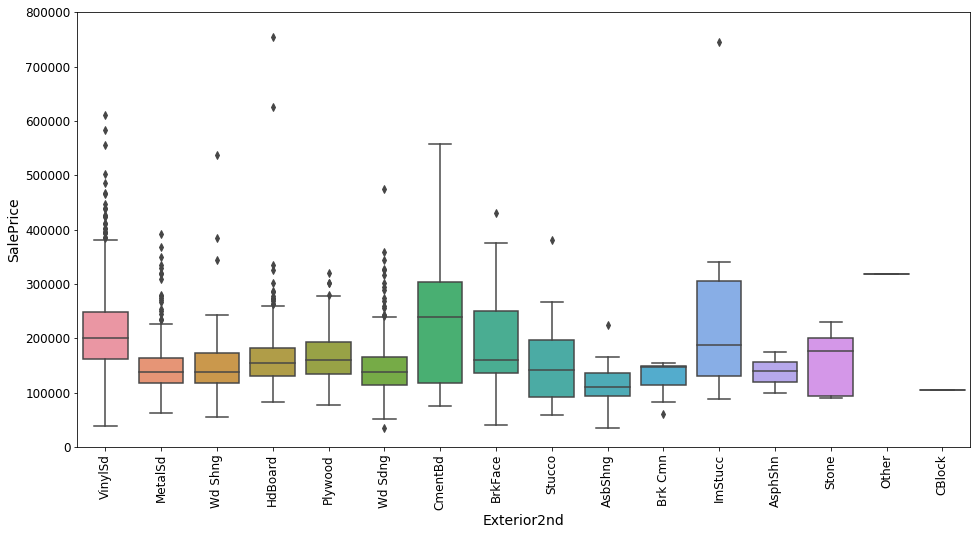

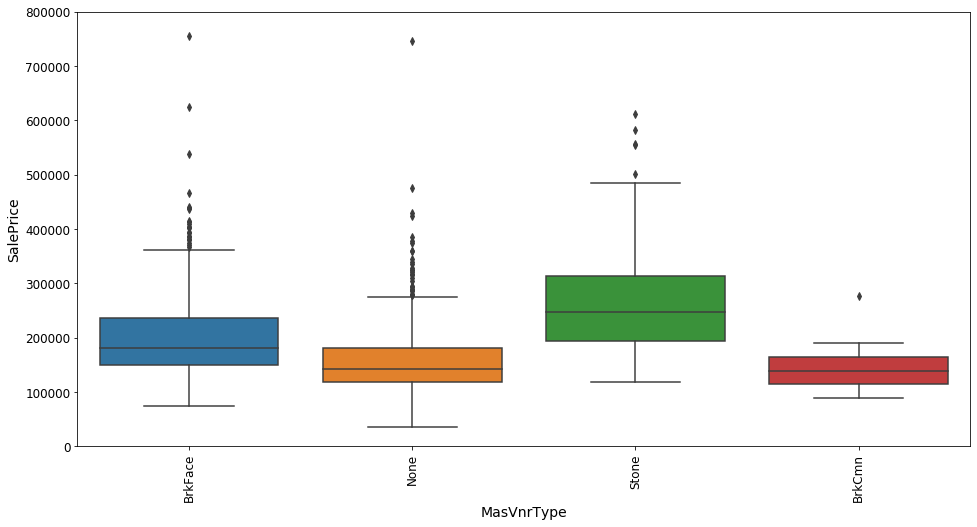

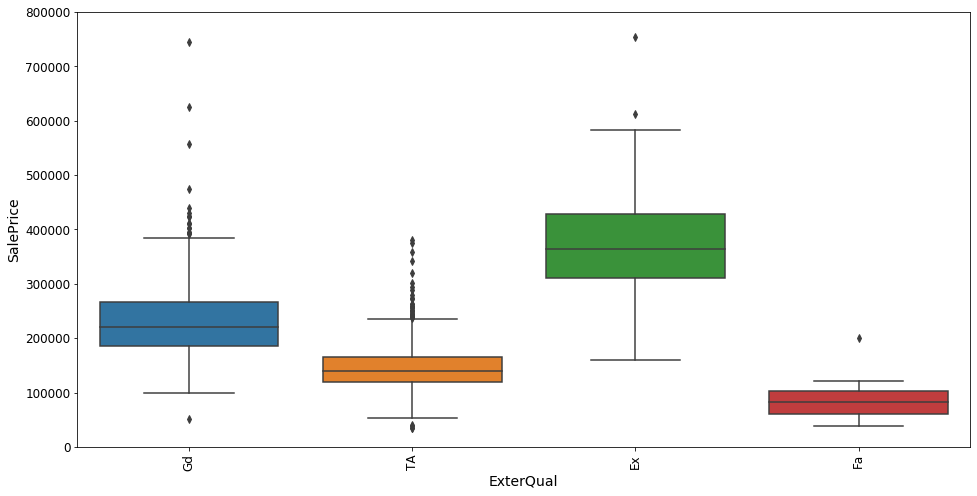

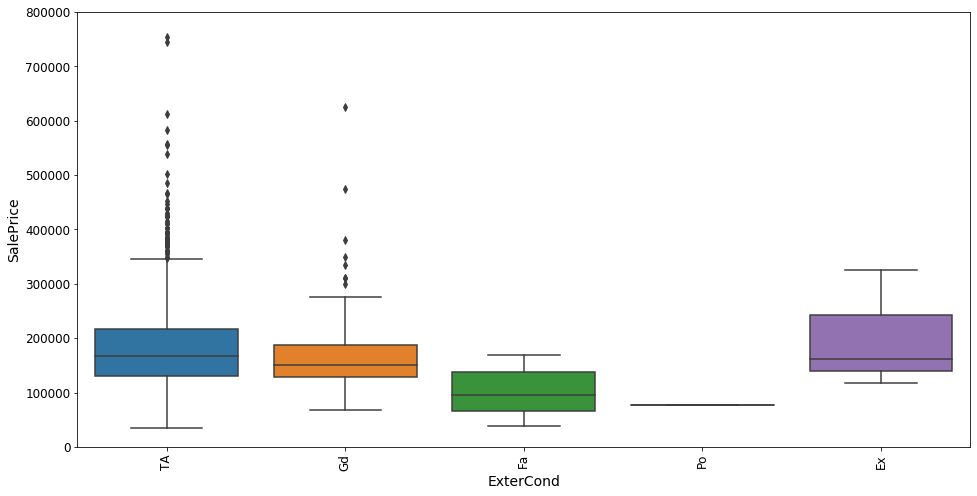

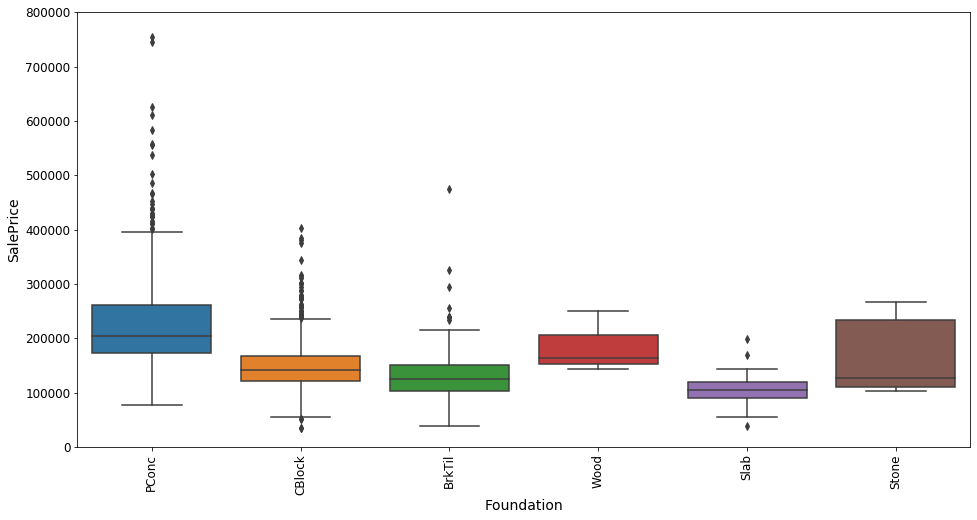

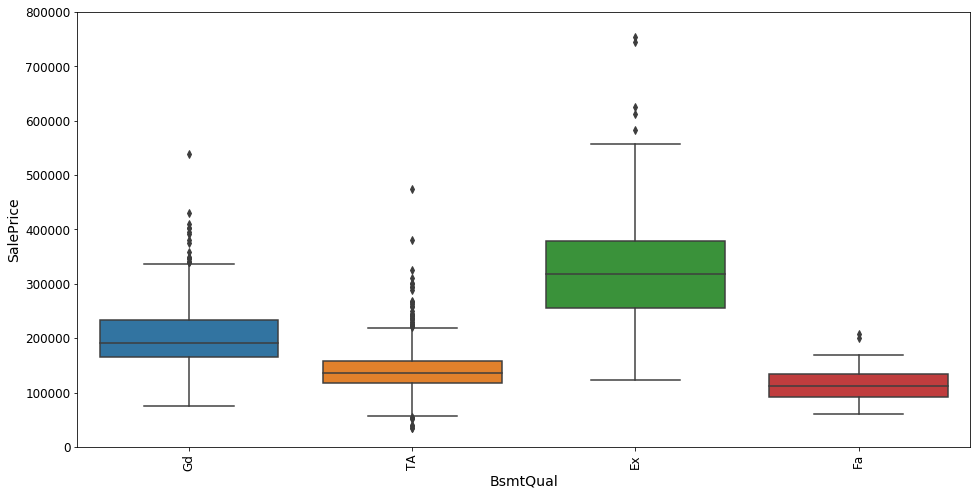

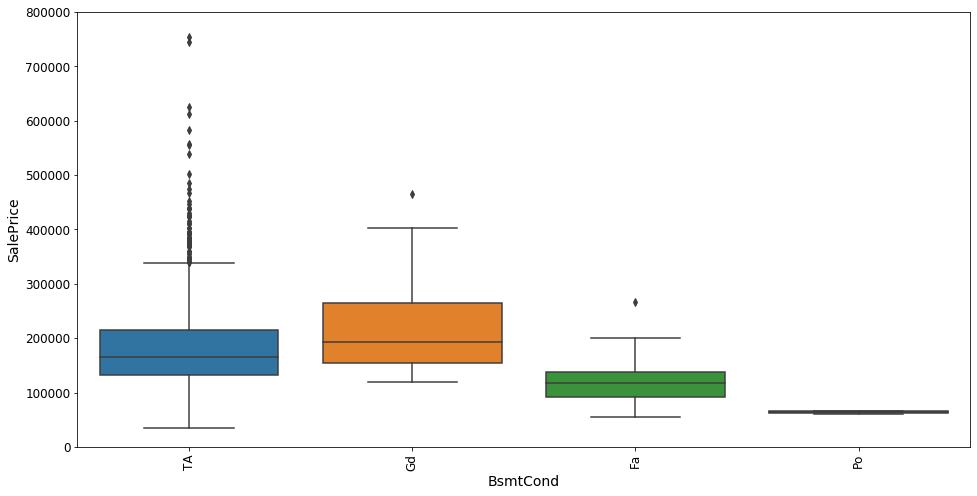

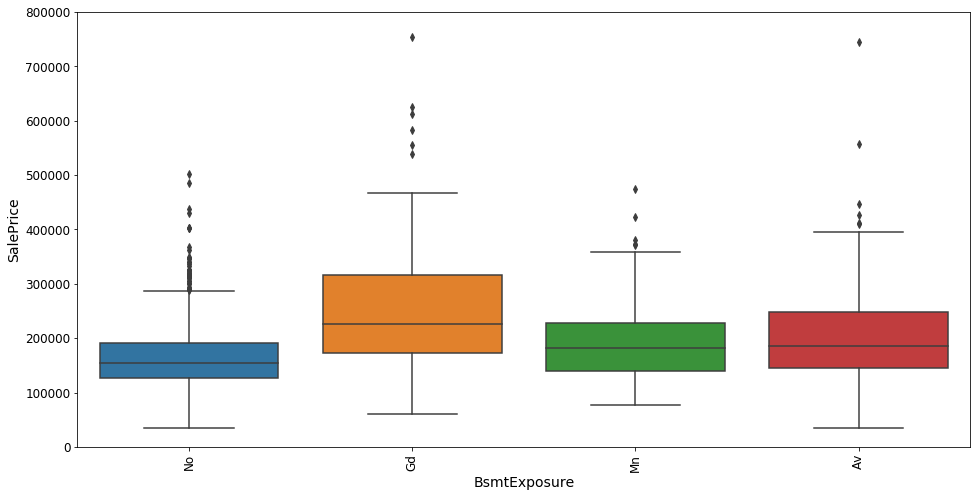

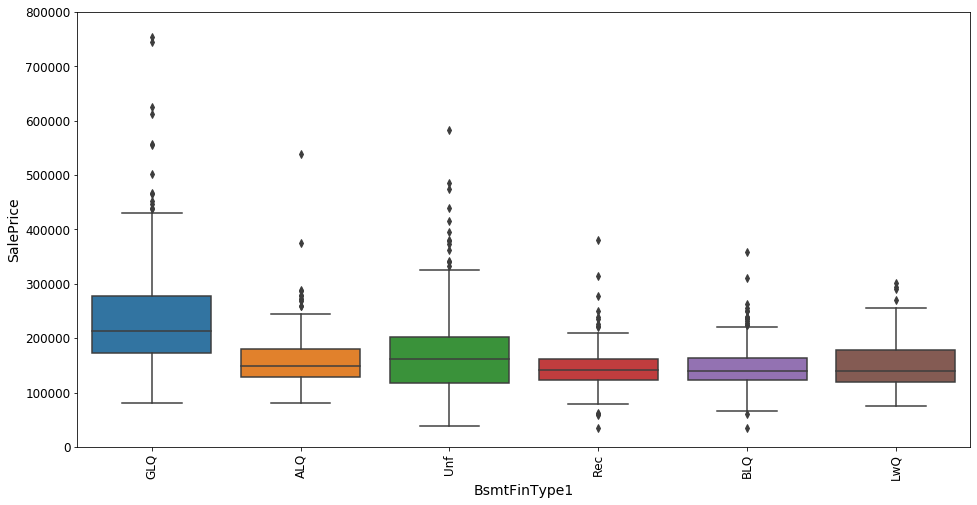

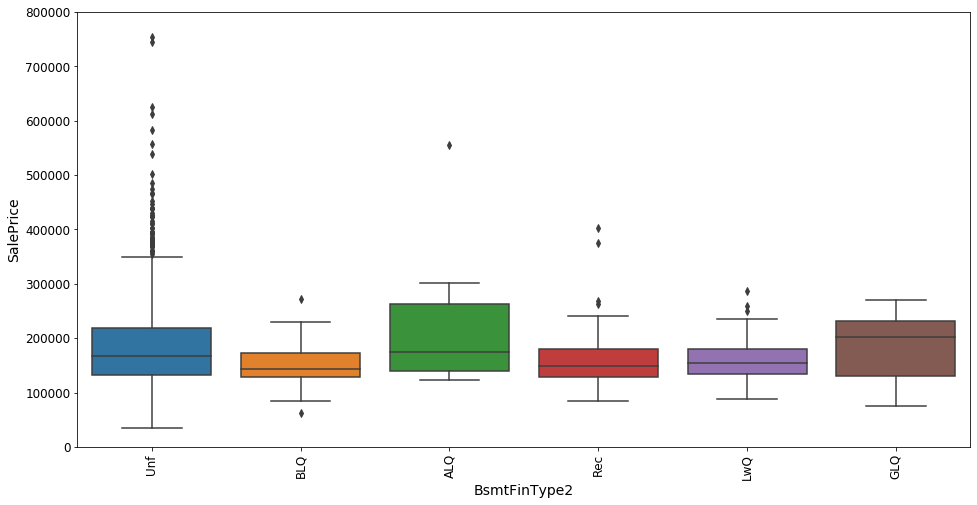

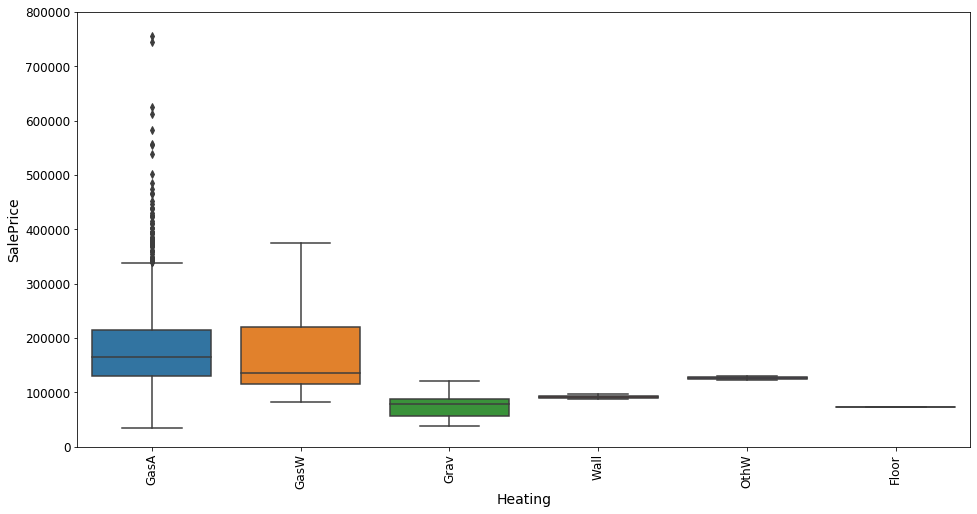

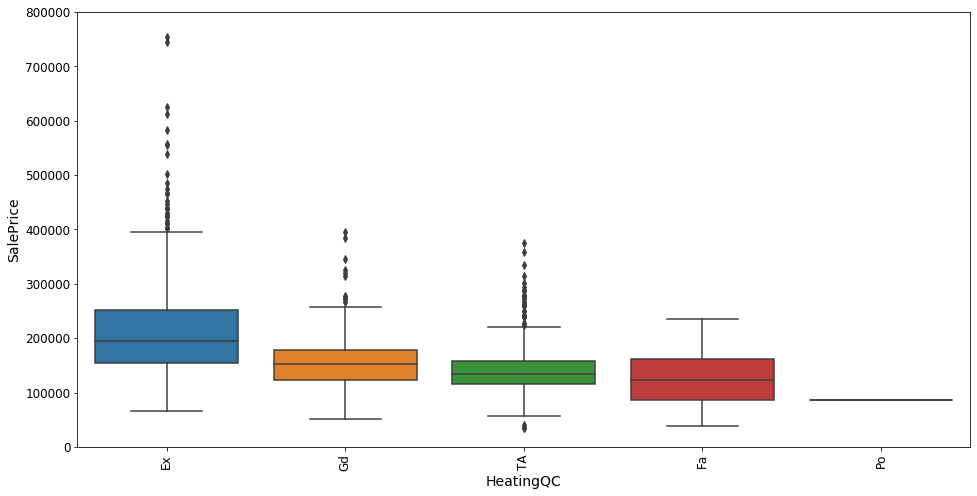

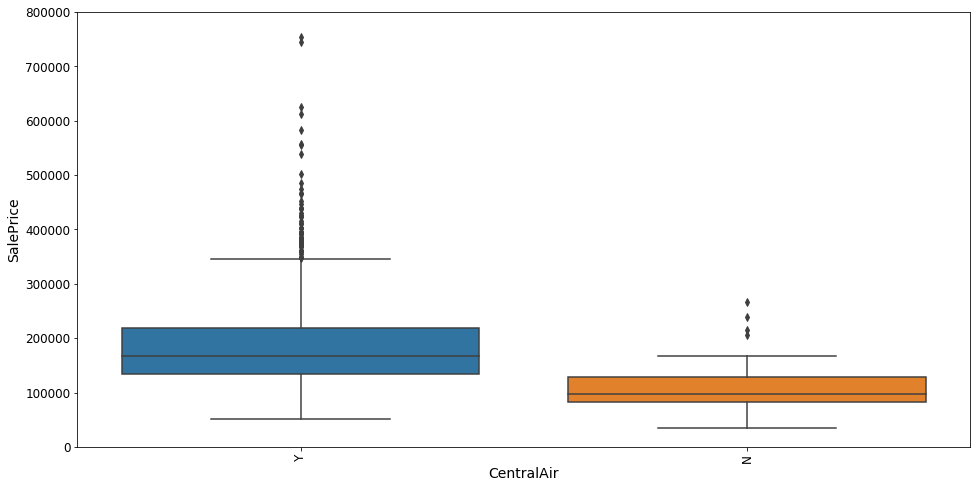

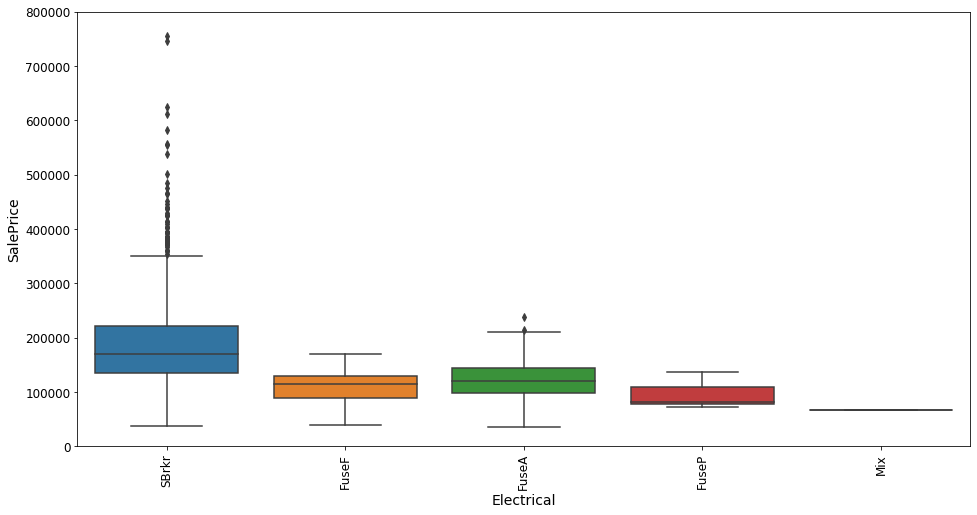

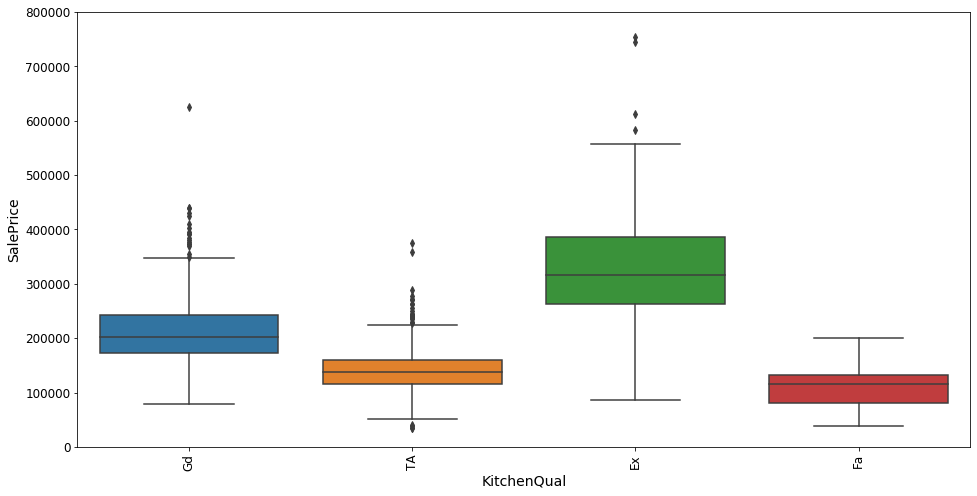

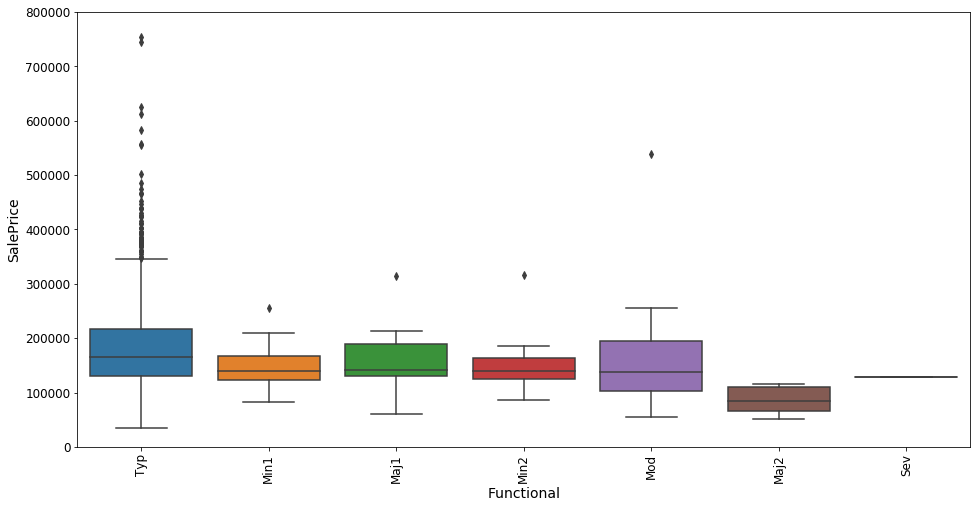

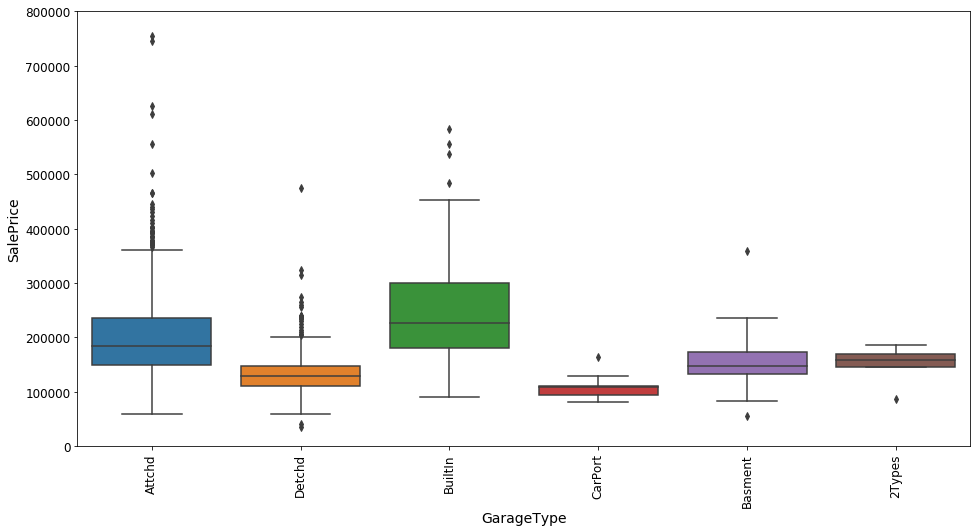

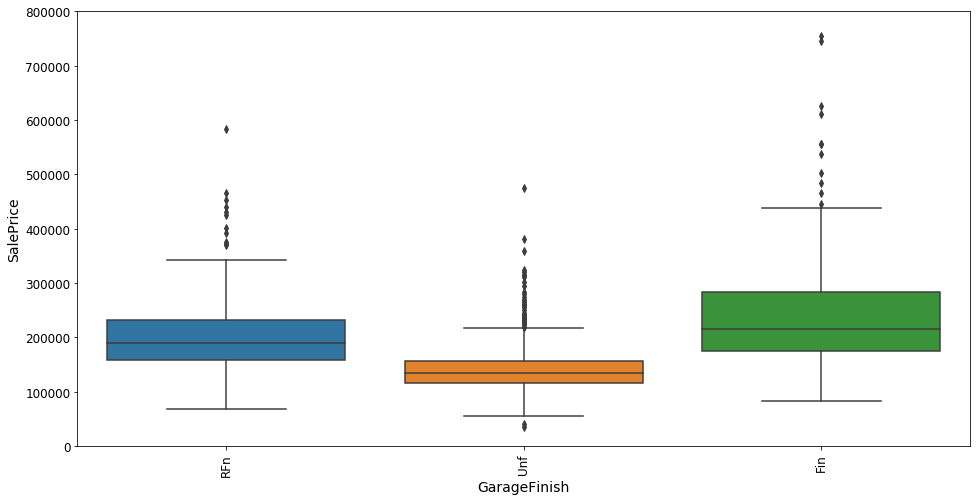

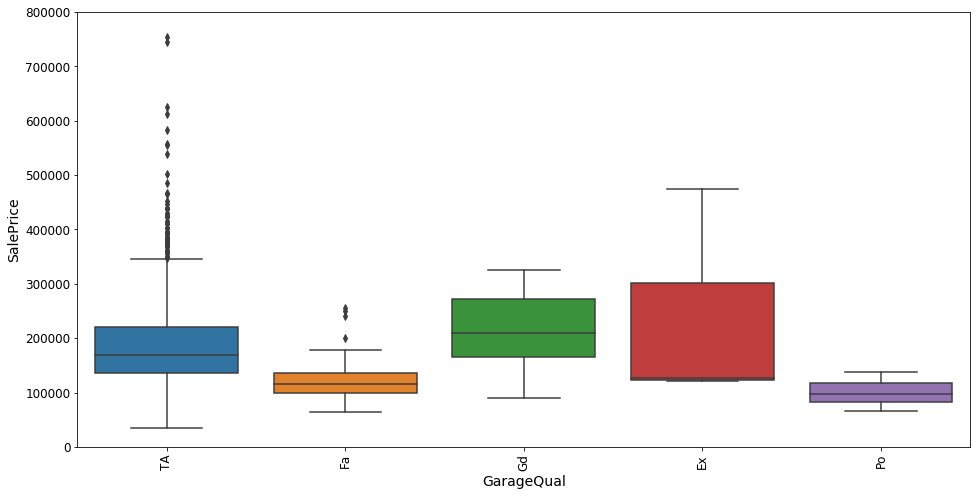

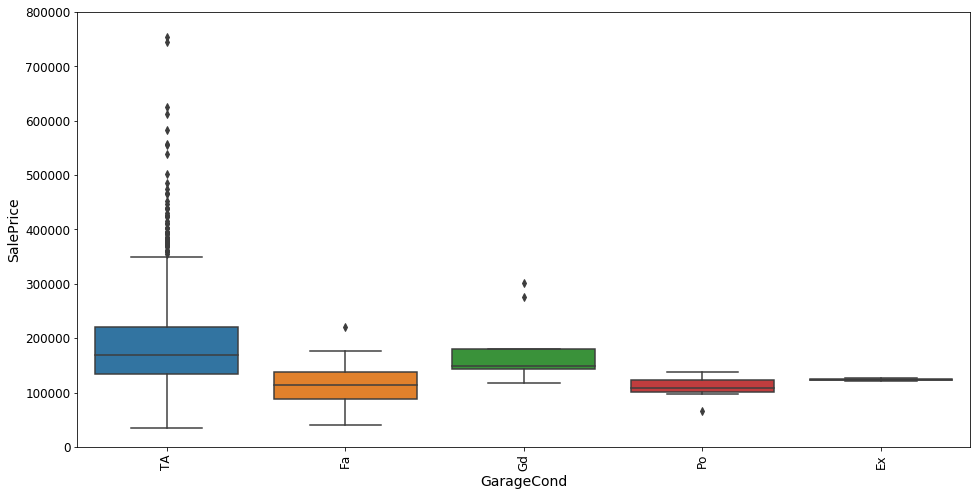

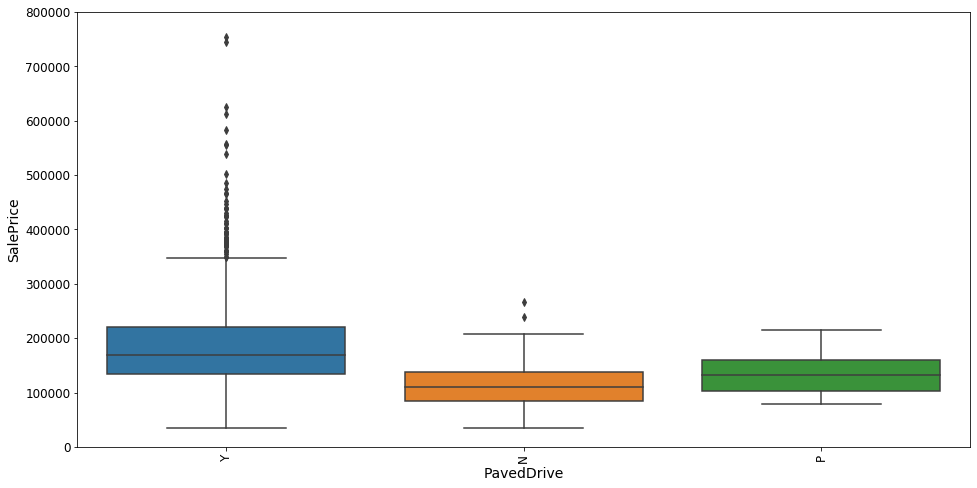

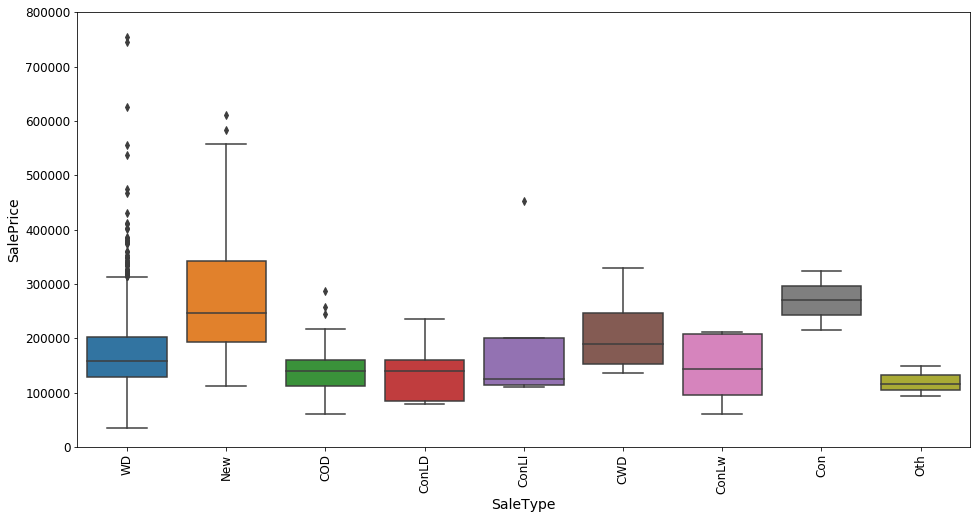

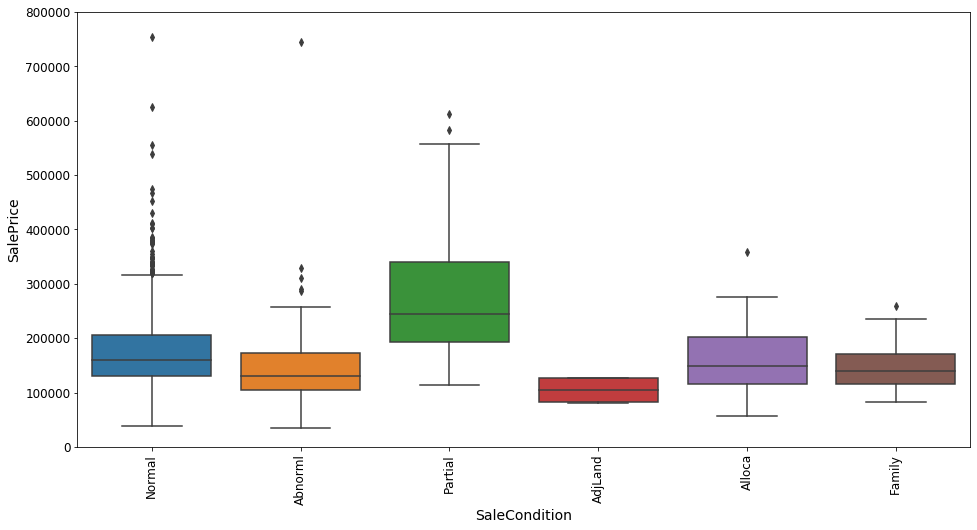

In [41]:
for i in list(df_not_num.columns):
    data = pd.concat([df_train['SalePrice'], df_train[i]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=i, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
    plt.xticks(rotation=90);

### Model Preparation

#### Feature Engineering

- Target Variable

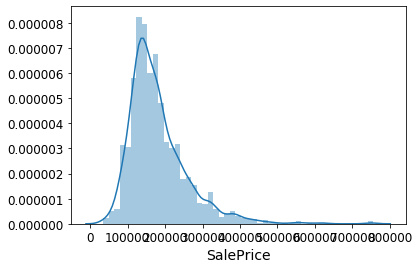

In [42]:
#histogram
sns.distplot(df_train['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

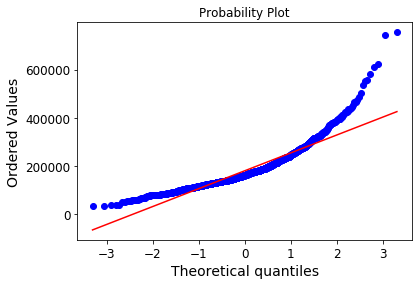

In [43]:
#normal probability plot
stats.probplot(df_train['SalePrice'], plot = plt)

The SalePrice is skewed to the right. Applying a log tranform to fix the skew and make it as normal distributed data.

In [44]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

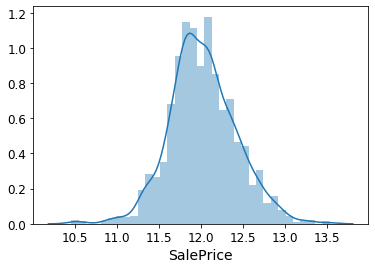

In [45]:
#check again the histogram
sns.distplot(df_train['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

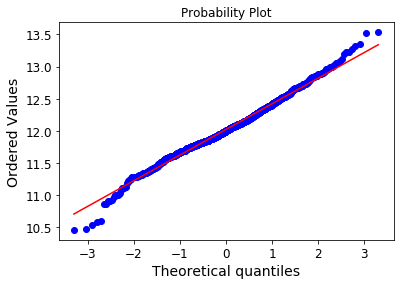

In [46]:
stats.probplot(df_train['SalePrice'], plot = plt)

- Handle Missing

In [47]:
#check missing again
re_missing = missing_values_table(df_train)
re_missing.sort_values(by = '% of Missing Values', ascending = False)

,Missing Values,% of Missing Values
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247
BsmtCond,37,2.534247


In [48]:
#Some of the non-numeric predictors are stored as numbers; convert them into strings
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['YrSold'] = df_train['YrSold'].apply(str)
df_train['MoSold'] = df_train['MoSold'].apply(str)

In [49]:
def handle_missing(features):
    # the data description states that NA refers to typical ('Typ') values
    features['Functional'] = features['Functional'].fillna('Typ')
    # Replace the missing values in each of the columns below with their mode
    features['Electrical'] = features['Electrical'].fillna("SBrkr")
    features['KitchenQual'] = features['KitchenQual'].fillna("TA")
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    # Replacing the missing values with 0, since no garage = no cars in garage
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        features[col] = features[col].fillna(0)
    # Replacing the missing values with None
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        features[col] = features[col].fillna('None')
    # NaN values for these categorical basement features, means there's no basement
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        features[col] = features[col].fillna('None')
        
    # Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # We have no particular intuition around how to fill in the rest of the categorical features
    # So we replace their missing values with None
    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
        
    # And we do the same thing for numerical features, but this time with 0s
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features

df_train = handle_missing(df_train)

In [50]:
rere_missing = missing_values_table(df_train)
rere_missing.sort_values(by = '% of Missing Values', ascending = False)

,Missing Values,% of Missing Values


- Deal with Numerical Features

In [51]:
# get numerical feature list
numeric_feats = df_train.dtypes[df_train.dtypes != 'object'].index[:-1] #remove target variable
numeric_feats

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

**Remove highly correlated features**

In [52]:
corr = df_train[numeric_feats].corr()
df_corr = pd.DataFrame(corr)
temp_lst = []

for i in df_corr.index:
    for c in df_corr.columns:
        if c == i:
            continue
        else:
            if df_corr.loc[i,c] >= 0.6:
                if [i,c] not in temp_lst and [c,i] not in temp_lst:
                    temp_lst.append([i,c])
                    print("{0} and {1}: {2}".format(i,c,df_corr.loc[i,c]))

OverallQual and GarageCars: 0.6006707165907189
BsmtFinSF1 and BsmtFullBath: 0.6492117535742737
TotalBsmtSF and 1stFlrSF: 0.8195299750050355
2ndFlrSF and GrLivArea: 0.6875010641666008
2ndFlrSF and HalfBath: 0.6097073002717444
2ndFlrSF and TotRmsAbvGrd: 0.6164226354915353
GrLivArea and FullBath: 0.6300116462511144
GrLivArea and TotRmsAbvGrd: 0.8254893743088377
BedroomAbvGr and TotRmsAbvGrd: 0.6766199357426479
GarageCars and GarageArea: 0.8824754142814603


In [53]:
# Remove highly correlated columns with business judgement
multicoll_corr = ['1stFlrSF', 'TotRmsAbvGrd', 'GarageCars', 'BsmtFinSF1','2ndFlrSF', 'FullBath', 'TotRmsAbvGrd']
df_train.drop(columns = multicoll_corr, inplace = True)
# redefine numerical variable list
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index[:-1] # remove target variable

**Feature scaling**

Getting all attributes to have the same scale

In [54]:
from sklearn.preprocessing import StandardScaler

numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index
# define standard scaler
scaler = StandardScaler()
# transform data
df_train[numeric_feats] = scaler.fit_transform(df_train[numeric_feats])

In [55]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,-0.231877,-0.207142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2,2008,WD,Normal,0.560068
1,20,RL,0.437043,-0.091886,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,5,2007,WD,Normal,0.212764
2,60,RL,-0.098093,0.073480,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,9,2008,WD,Normal,0.734046
3,70,RL,-0.454850,-0.096897,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,2,2006,WD,Abnorml,-0.437382
4,60,RL,0.615421,0.375148,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,12,2008,WD,Normal,1.014651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,-0.365661,-0.260560,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,8,2007,WD,Normal,0.121434
1456,20,RL,0.660016,0.266407,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2,2010,WD,Normal,0.578020
1457,70,RL,-0.187282,-0.147810,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,5,2010,WD,Normal,1.174708
1458,20,RL,-0.098093,-0.080160,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,4,2010,WD,Normal,-0.399656


- Deal with Categorical Features

Using one-hot encoding to create a new column for each unique category in a categorical variable to make machine learning models able to deal with categorical variables.

In [57]:
df_train=pd.get_dummies(df_train)

In [58]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.231877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,-0.288653,-0.944591,-0.459303,...,0,0,0,1,0,0,0,0,1,0
1,0.437043,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,-0.288653,-0.641228,0.466465,...,0,0,0,1,0,0,0,0,1,0
2,-0.098093,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,-0.288653,-0.301643,-0.313369,...,0,0,0,1,0,0,0,0,1,0
3,-0.454850,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.288653,-0.061670,-0.687324,...,0,0,0,1,1,0,0,0,0,0
4,0.615421,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,-0.288653,-0.174865,0.199680,...,0,0,0,1,0,0,0,0,1,0


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 303 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(28), uint8(275)
memory usage: 711.6 KB


### Train models

**Define x and y**

In [62]:
housing_prepared = df_train.drop(columns = 'SalePrice')
housing_labels = df_train['SalePrice']

**Try linear regression first**

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Evaluate the model**

In [65]:
from sklearn.metrics import mean_squared_error
#predit
housing_predictions = lin_reg.predict(housing_prepared)
#evaluate
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.2357180169903466

In [66]:
#use another way to evaluate the performance. for example, if there are many outliers, we should also consider using the MAE
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

0.16255987754477422

**Try RandomForest**

In [67]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [68]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.1363670326931803

In [69]:
forest_mae = mean_absolute_error(housing_labels, housing_predictions)
forest_mae

0.09115206298818974

### Train and Test Split

In [ ]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing_labels, test_size=0.3, random_state=42)

### Cross Validation

In [ ]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
cdisplay_scores(lin_rmse_scores)

Scores: [0.37203397 0.34173797 0.50434821 0.71667221 0.46961586 0.39513962
 0.39945495 0.34570987 0.36876272 0.32849264]
Mean: 0.4241968011986649
Standard deviation: 0.11108479705079964


In [ ]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.43071165 0.35199897 0.39021129 0.45028876 0.43429412 0.3395538
 0.35707821 0.33700585 0.39224868 0.40356968]
Mean: 0.3886961021145491
Standard deviation: 0.03912479848397064


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
# Get the feature importances for each feature using the following code
final_model.feature_importances_

array([0.29898435, 0.18660456, 0.08527996, 0.10172456, 0.10584119,
       0.03785383, 0.01464508, 0.00271416, 0.03424555, 0.00443977,
       0.01433115, 0.00367887, 0.01805872, 0.00334228, 0.01182889,
       0.00978892, 0.0099543 , 0.00554567, 0.00576607, 0.00533115,
       0.01502211, 0.02501886])

In [ ]:
# Associate these feature importances with the corresponding features
feature_importance_df = pd.DataFrame(list(zip(final_model.feature_importances_, list(X_train.columns))))
feature_importance_df.columns = ['feature.importance', 'feature']
feature_importance_df.sort_values(by='feature.importance', ascending=False).head(20) # only show top 20

,feature.importance,feature
0,0.298984,OverallQual
1,0.186605,GrLivArea
4,0.105841,YearBuilt
3,0.101725,TotalBsmtSF
2,0.085280,GarageArea
5,0.037854,YearRemodAdd
8,0.034246,Fireplaces
21,0.025019,ExterQual_TA
12,0.018059,MasVnrArea
20,0.015022,KitchenQual_TA
